<p float="center">
  <img src=https://informacion.unad.edu.co/images/acerca%20de%20la%20unad/simbolos/logo_vertical.png width="300" />
</p>

# Análisis de mortalidad

***Elaborado por:*** ***Carlos Alberto Álvarez Henao, I.C. DS.C*** ([carlos.alvarez@unad.edu.co](mailto:carlos.alvarez@unad.edu.co))

***Escuela de Ciencias Básicas, Tecnología e Ingeniería (ECBTI)***

Abril 27, 2020 - Medellín, Colombia


En el siguiente documento se realizará un breve análisis del porcentaje de mortalidad en Colombia en relación a los demás países que han reportado decesos por causa de la pandemia del COVID-19. Los datos se extrajeron de la página [Mortality Analyses](https://coronavirus.jhu.edu/data/mortality) de la Universidad *John Hopkins*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paises=pd.read_html("https://coronavirus.jhu.edu/data/mortality") #, header = 0)
print(paises)

[                 Country  Confirmed  Deaths Case-Fatality  Deaths/100k pop.
0                     US     965785   54881          5.7%             16.77
1                  Italy     197675   26644         13.5%             44.09
2                  Spain     226629   23190         10.2%             49.63
3                 France     162220   22890         14.1%             34.17
4         United Kingdom     154037   20794         13.5%             31.27
..                   ...        ...     ...           ...               ...
133  Antigua and Barbuda         24       3         12.5%              3.12
134            Nicaragua         13       3         23.1%              0.05
135             Ethiopia        123       3          2.4%              0.00
136                Gabon        176       3          1.7%              0.14
137               Zambia         88       3          3.4%              0.02

[138 rows x 5 columns]]


Veamos qué tipo de estructura de dato fue crada con este procedimiento

In [3]:
print(type(paises))

<class 'list'>


Como se puede observar, es una lista. Vamos entonces a convertir esta lista en un `DataFrame` de `Pandas` para poder realizar análisis con dicha información

In [4]:
dfpaises = paises[0]
dfpaises.head(5)

,Country,Confirmed,Deaths,Case-Fatality,Deaths/100k pop.
0,US,965785,54881,5.7%,16.77
1,Italy,197675,26644,13.5%,44.09
2,Spain,226629,23190,10.2%,49.63
3,France,162220,22890,14.1%,34.17
4,United Kingdom,154037,20794,13.5%,31.27


In [5]:
dfpaises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           138 non-null    object 
 1   Confirmed         138 non-null    int64  
 2   Deaths            138 non-null    int64  
 3   Case-Fatality     138 non-null    object 
 4   Deaths/100k pop.  134 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.5+ KB


Ahora observamos que hay varias columnas que son de tipo `object`, es decir, `Pandas` no logra identificar a qué tipo de datos corresponde, por lo que es necesario convertirlo al tipo de dato adecuado para este caso (valores numéricos). Obsérvese también que en la columna '*Case-Fatality*' aparece el símbolo `%`, que es el causante de dicho problema.

In [6]:
dfpaises['Case-Fatality'] = list(map(lambda x: x[:-1], dfpaises['Case-Fatality'].values))
dfpaises['Case-Fatality'] = [float(x) for x in dfpaises['Case-Fatality'].values]
dfpaises.head(5)

,Country,Confirmed,Deaths,Case-Fatality,Deaths/100k pop.
0,US,965785,54881,5.7,16.77
1,Italy,197675,26644,13.5,44.09
2,Spain,226629,23190,10.2,49.63
3,France,162220,22890,14.1,34.17
4,United Kingdom,154037,20794,13.5,31.27


In [7]:
dfpaises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           138 non-null    object 
 1   Confirmed         138 non-null    int64  
 2   Deaths            138 non-null    int64  
 3   Case-Fatality     138 non-null    float64
 4   Deaths/100k pop.  134 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.5+ KB


Ya conseguimos convertir la columna '*Case-Fatality*' a valores numéricos y podemos continuar en nuestro trabajo. Ahora vamos a imprimir la columna 'Country' con '*Case-Fatality*' para determinar como es la distribución de casos mortales por países. 

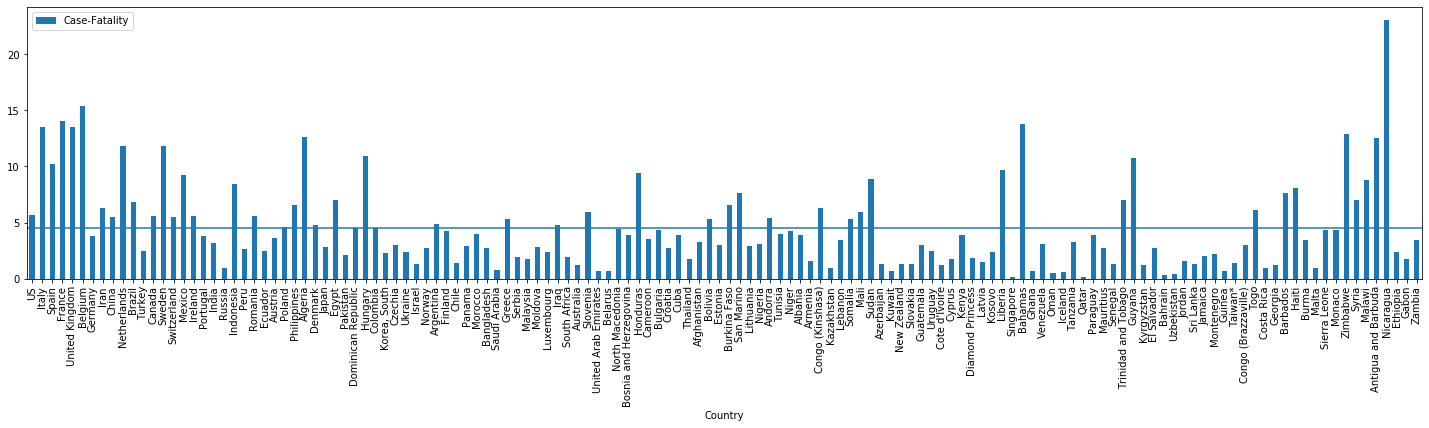

Media: fatalidad del 4.50% /100k habitantes en todos los paises con casos confirmados (138 paises)


In [8]:
fig,ax= plt.subplots()

dfpaises.plot(x='Country', y='Case-Fatality', ax = ax, kind='bar', figsize=(25,5))
mean = dfpaises["Case-Fatality"].mean()
ax.axhline(mean)
plt.show()

print("Media: fatalidad del {0:4.2f}% /100k habitantes en todos los paises con casos confirmados ({1} paises)".format(mean,len(dfpaises)))

Como se observa, hay muchos países que reportan una tasa de mortalidad muy baja, y hay otros, como Nicaragua, que están muy por encima del valor de la media $=4.5$ aprox. Esto sucede porque, en la mayoría, esos países han reportado muy pocos casos, y cualquier cambio en los datos iniciales, afectan considerablemente las salidas. 

Vamos a filtrar los países que tienen más de 5000 casos detectados (Colombia al día de hoy ya alcanzó esta cifra). Esto ya nos podrá ir brindando una tendencia en la tasa de mortalidad pues se cuenta con una buena cantidad de datos que no será sensible a pequeños cambios en la mortandad. Adicionalmente, vamos a ordenar de mayor a menor tasa de mortalidad por pais.

In [9]:
dfpaisesGT5000 = dfpaises[dfpaises['Confirmed'] > 5000]
dfpaisesGT5000 = dfpaisesGT5000.sort_values(by=['Case-Fatality'], ascending=False)
dfpaisesGT5000.head(5)

,Country,Confirmed,Deaths,Case-Fatality,Deaths/100k pop.
5,Belgium,46134,7094,15.4,62.11
3,France,162220,22890,14.1,34.17
4,United Kingdom,154037,20794,13.5,31.27
1,Italy,197675,26644,13.5,44.09
9,Netherlands,38040,4491,11.8,26.06


Extrayendo la información puntual de Colombia (o de cualquier pais en la lista)

In [10]:
country = "Colombia"
individualCountry = dfpaisesGT5000.loc[dfpaisesGT5000['Country'] == country]
individualCountry.head()

,Country,Confirmed,Deaths,Case-Fatality,Deaths/100k pop.
34,Colombia,5379,244,4.5,0.49


Media: fatalidad del 4.86% /100k habitantes en todos los paises con casos confirmados (48 paises)


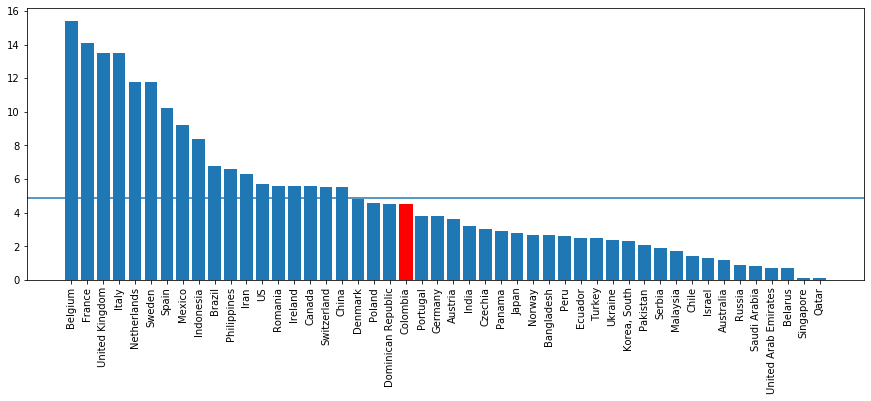

In [11]:
base = dfpaisesGT5000.index.get_indexer_for((dfpaisesGT5000[dfpaisesGT5000.Country == country].index))

fig,ax= plt.subplots(figsize = (15,5))
barlist = plt.bar(dfpaisesGT5000['Country'],dfpaisesGT5000['Case-Fatality'])
barlist[base[0]].set_color('r')
mean = dfpaisesGT5000["Case-Fatality"].mean()
ax.axhline(mean)
plt.xticks(rotation=90)
plt.show

print("Media: fatalidad del {0:4.2f}% /100k habitantes en todos los paises con casos confirmados ({1} paises)".format(mean,len(dfpaisesGT5000)))

Se observa que la media subió 0.42 puntos respecto a la totalidad de paises que han reportado víctimas (137 inicialmente). Colombia se encuentra un poco por debajo de esa media, con una fatalidad del 4.5% / 100k habitantes. Países vecinos, Ecuador y Perú, que tienen entre 4 y 5 veces más casos confirmados, presenatan una tasa de mortalidad del 2.8% y 2.5% respectivamente. 